# **Heart Disease Prediction using Decision Trees and Random Forests**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import graphviz
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


###   Load and Prepare Data
*  Load the dataset and split it into training and testing sets.
* We'll read the CSV file into a pandas DataFrame and then separate the features (X) from the target variable (y).
* Finally, we'll split the data to evaluate our models effectively.

In [ ]:
# Load the dataset
url = "https://raw.githubusercontent.com/SiddardhaShayini/Heart-Disease-Prediction-using-Decision-Trees-and-Random-Forests/refs/heads/main/Dataset/heart.csv"
df = pd.read_csv(url)

In [ ]:
# Display the first few rows and basic info to understand the data
print("Dataset Head:")
df.head()

Dataset Head:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
print("Dataset Tail:")
df.tail()

Dataset Tail:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


In [ ]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
print("\nDataset Description:")
df.describe()


Dataset Description:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
print("\nTarget Distribution:")
print(df['target'].value_counts())


Target Distribution:
target
1    526
0    499
Name: count, dtype: int64


In [ ]:
# Separate features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

In [ ]:
# Split the data into training and testing sets
# We use stratify=y to ensure that both training and testing sets have a similar proportion of target classes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Training set shape: (717, 13)
Testing set shape: (308, 13)


### Train a Decision Tree Classifier and visualize the tree
* Train a basic Decision Tree and visualize its structure.
* We'll initialize a DecisionTreeClassifier, fit it to our training data, and then use graphviz to create a visual representation of the tree.

In [ ]:
# Initialize and train a Decision Tree Classifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_dt = dt_classifier.predict(X_test)

In [ ]:
# Evaluate the Decision Tree Classifier
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"\nDecision Tree Classifier Accuracy: {accuracy_dt:.4f}")
print("\nDecision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))
print("\nDecision Tree Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))


Decision Tree Classifier Accuracy: 0.9805

Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308


Decision Tree Confusion Matrix:
[[150   0]
 [  6 152]]


**Decision Tree Classifier Summary:**

Accuracy: 98.05%

Class 0: Perfect precision and recall (150 correct)

Class 1: 6 misclassified as Class 0

Overall Performance: Very high precision, recall, and F1-score (all 0.98)

Confusion Matrix:

True Positives: 150 (Class 0), 152 (Class 1)

False Negatives: 6 (Class 1 predicted as 0)

No False Positives



Conclusion: The model performs very well with minimal errors.

In [ ]:
# Visualize the Decision Tree
# Note: For larger trees, this visualization can be very complex.
dot_data = export_graphviz(dt_classifier, out_file=None,
                           feature_names=X.columns,
                           class_names=['No Disease', 'Disease'],
                           filled=True, rounded=True,
                           special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree_full", view=True, format='png') # Saves as PNG and opens it

print("\nFull Decision Tree visualization saved as 'decision_tree_full.png'")


Full Decision Tree visualization saved as 'decision_tree_full.png'


###Analyze overfitting and control tree depth
* Demonstrate overfitting and show how `max_depth` can control it.
* We'll train Decision Trees with different `max_depth` values, observe their performance on training and testing sets, and visualize a pruned tree.

In [ ]:
# Train a Decision Tree with a very small depth to illustrate pruning
dt_pruned = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

In [ ]:
# Evaluate the pruned tree
y_pred_pruned = dt_pruned.predict(X_test)
accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
print(f"\nDecision Tree (max_depth=3) Accuracy: {accuracy_pruned:.4f}")


Decision Tree (max_depth=3) Accuracy: 0.8571


In [ ]:
# Visualize the pruned Decision Tree
dot_data_pruned = export_graphviz(dt_pruned, out_file=None,
                                  feature_names=X.columns,
                                  class_names=['No Disease', 'Disease'],
                                  filled=True, rounded=True,
                                  special_characters=True)
graph_pruned = graphviz.Source(dot_data_pruned)
graph_pruned.render("decision_tree_pruned", view=True, format='png') # Saves as PNG and opens it

print("Pruned Decision Tree (max_depth=3) visualization saved as 'decision_tree_pruned.png'")

Pruned Decision Tree (max_depth=3) visualization saved as 'decision_tree_pruned.png'


In [ ]:
# Plotting training and testing accuracy vs. max_depth to show overfitting
train_accuracies = []
test_accuracies = []
depths = range(1, 15) # Test depths from 1 to 14

In [ ]:
for depth in depths:
    dt = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt.fit(X_train, y_train)
    train_accuracies.append(accuracy_score(y_train, dt.predict(X_train)))
    test_accuracies.append(accuracy_score(y_test, dt.predict(X_test)))

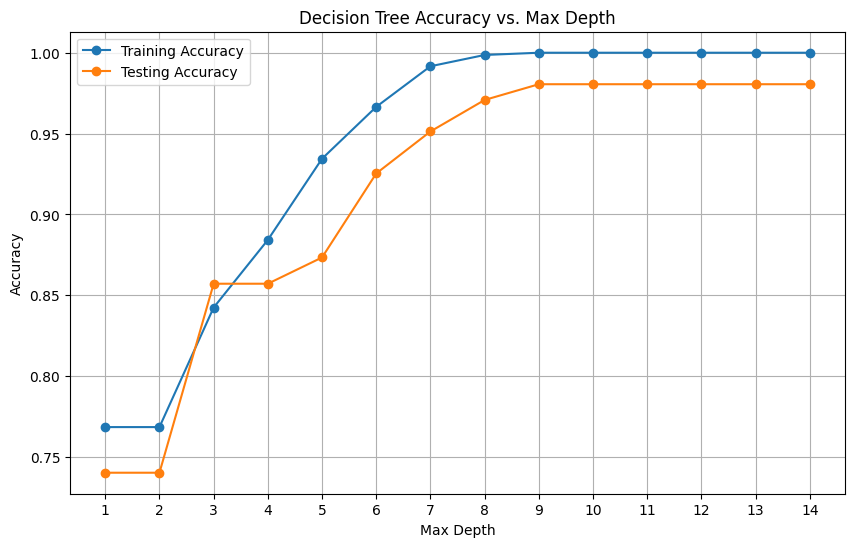

Accuracy vs. Max Depth plot saved as 'dt_accuracy_vs_depth.png'


In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(depths, train_accuracies, label='Training Accuracy', marker='o')
plt.plot(depths, test_accuracies, label='Testing Accuracy', marker='o')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(depths)
plt.legend()
plt.grid(True)
plt.savefig('dt_accuracy_vs_depth.png')
plt.show()
print("Accuracy vs. Max Depth plot saved as 'dt_accuracy_vs_depth.png'")

###Train a Random Forest and compare accuracy
* Build a Random Forest model and compare its performance to the Decision Tree.
* Random Forests are an ensemble method that builds multiple decision trees and merges their predictions. This often leads to better generalization and reduced overfitting.

In [ ]:
# Initialize and train a Random Forest Classifier
# n_estimators: number of trees in the forest
# random_state: for reproducibility
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, oob_score=True, n_jobs=-1)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
# Make predictions on the test set
y_pred_rf = rf_classifier.predict(X_test)

In [ ]:
# Evaluate the Random Forest Classifier
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"\nRandom Forest Classifier Accuracy: {accuracy_rf:.4f}")
print("\nRandom Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nRandom Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier Accuracy: 0.9805

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       150
           1       1.00      0.96      0.98       158

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308


Random Forest Confusion Matrix:
[[150   0]
 [  6 152]]


**Random Forest Classifier Summary:**

Accuracy: 98.05%

Class 0: All 150 correctly classified (perfect recall)

Class 1: 6 misclassified as Class 0

Precision, Recall, F1-score: All are 0.98 for both classes

Confusion Matrix:

True Positives: 150 (Class 0), 152 (Class 1)

False Negatives: 6 (Class 1 predicted as 0)

No False Positives



Conclusion: Excellent performance, same as Decision Tree, with high accuracy and minimal misclassification.

In [ ]:
print(f"\nOut-of-bag score (OOB): {rf_classifier.oob_score_:.4f}")


Out-of-bag score (OOB): 0.9847


In [ ]:
# Comparison
print(f"\nComparison:")
print(f"Decision Tree Accuracy: {accuracy_dt:.4f}")
print(f"Random Forest Accuracy: {accuracy_rf:.4f}")


Comparison:
Decision Tree Accuracy: 0.9805
Random Forest Accuracy: 0.9805


### **Model Comparison Summary:**

1. Accuracy (Same):

 - Decision Tree: 98.05%

 - Random Forest: 98.05%


2. Performance Metrics (Same):

 - Precision, Recall, F1-score: All around 0.98


3. Confusion Matrix (Same):

 - Correct: 150 (Class 0), 152 (Class 1)

 - Incorrect: 6 Class 1 samples misclassified as Class 0



**Conclusion:**
 - Both models perform equally well on this dataset. However, Random Forest is usually more robust and generalizes better on unseen data due to its ensemble nature.

### Interpret feature importances
* Understand which features are most influential in the Random Forest model's predictions.
* Random Forests provide a way to quantify the importance of each feature based on how much it contributes to reducing impurity across all trees in the forest.

In [ ]:
# Get feature importances
feature_importances = rf_classifier.feature_importances_
features = X.columns
importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

In [ ]:
print("\nFeature Importances (Random Forest):")
print(importance_df)


Feature Importances (Random Forest):
     Feature  Importance
2         cp    0.140129
7    thalach    0.131526
11        ca    0.116020
9    oldpeak    0.105527
12      thal    0.099114
0        age    0.098053
4       chol    0.081334
3   trestbps    0.067787
8      exang    0.061730
10     slope    0.037089
1        sex    0.032196
6    restecg    0.019197
5        fbs    0.010297


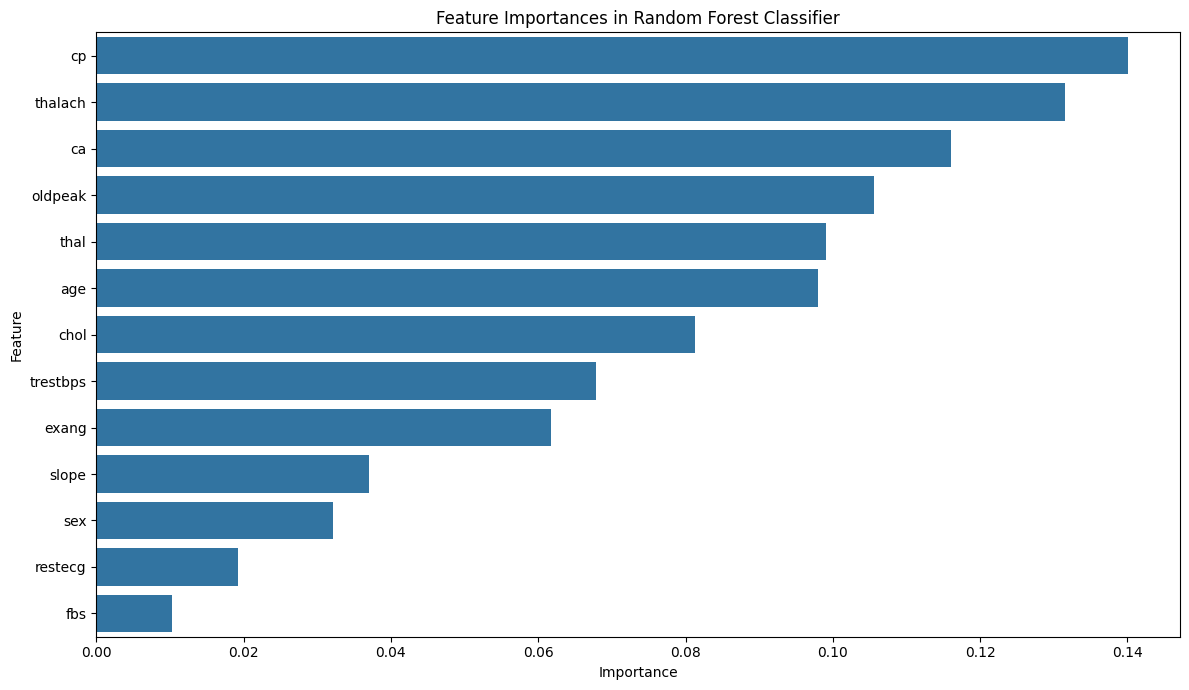

Feature Importances plot saved as 'feature_importances.png'


In [ ]:

# Visualize feature importances
plt.figure(figsize=(12, 7))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importances in Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('feature_importances.png')
plt.show()
print("Feature Importances plot saved as 'feature_importances.png'")

### Evaluate using cross-validation
* Get a more robust estimate of model performance using cross-validation.
* Instead of a single train-test split, cross-validation repeatedly splits the data and trains the model, providing a more reliable performance metric and reducing the impact of a particular split.

In [ ]:
# Decision Tree Cross-Validation
cv_scores_dt = cross_val_score(dt_classifier, X, y, cv=10, scoring='accuracy')
print(f"\nDecision Tree Cross-Validation Accuracies (10-fold): {cv_scores_dt}")
print(f"Decision Tree Mean Cross-Validation Accuracy: {cv_scores_dt.mean():.4f}")
print(f"Decision Tree Standard Deviation of Cross-Validation Accuracy: {cv_scores_dt.std():.4f}")


Decision Tree Cross-Validation Accuracies (10-fold): [1.         1.         1.         0.97087379 1.         1.
 1.         1.         1.         1.        ]
Decision Tree Mean Cross-Validation Accuracy: 0.9971
Decision Tree Standard Deviation of Cross-Validation Accuracy: 0.0087


In [ ]:
# Random Forest Cross-Validation
cv_scores_rf = cross_val_score(rf_classifier, X, y, cv=10, scoring='accuracy', n_jobs=-1)
print(f"\nRandom Forest Cross-Validation Accuracies (10-fold): {cv_scores_rf}")
print(f"Random Forest Mean Cross-Validation Accuracy: {cv_scores_rf.mean():.4f}")
print(f"Random Forest Standard Deviation of Cross-Validation Accuracy: {cv_scores_rf.std():.4f}")


Random Forest Cross-Validation Accuracies (10-fold): [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Random Forest Mean Cross-Validation Accuracy: 0.9971
Random Forest Standard Deviation of Cross-Validation Accuracy: 0.0088


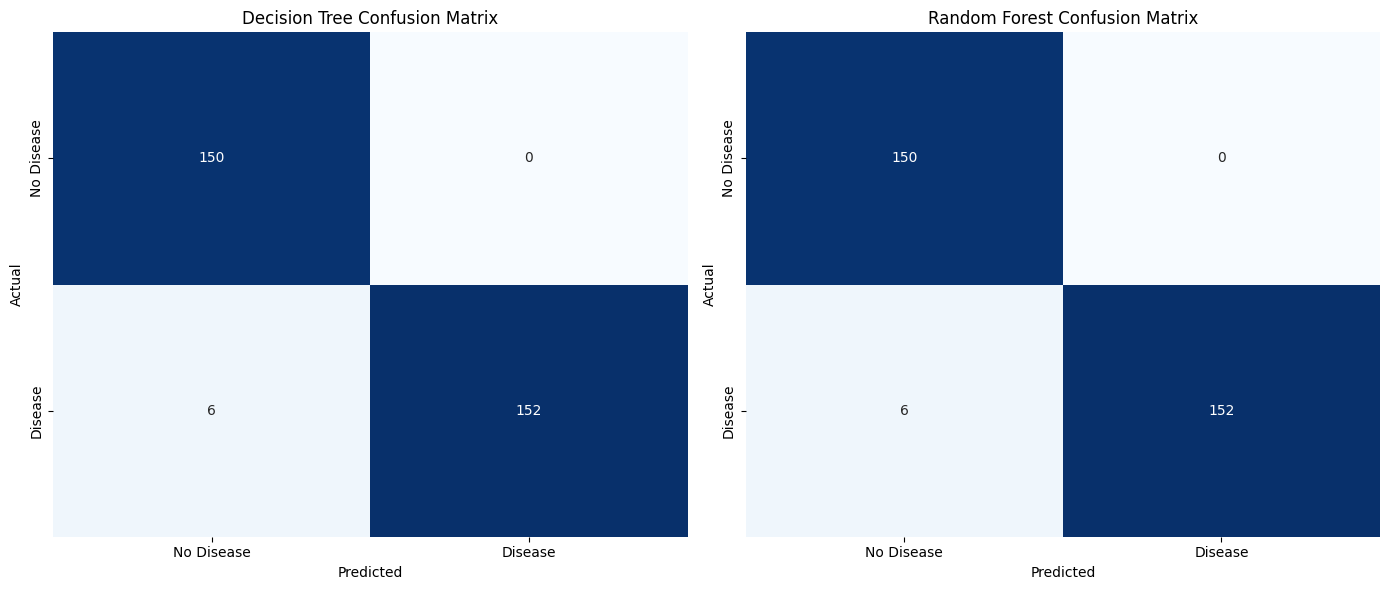

Confusion Matrices plot saved as 'confusion_matrices.png'


In [ ]:
# Plot Confusion Matrix for Random Forest
def plot_confusion_matrix(y_true, y_pred, title, ax):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_xticklabels(['No Disease', 'Disease'])
    ax.set_yticklabels(['No Disease', 'Disease'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

plot_confusion_matrix(y_test, y_pred_dt, 'Decision Tree Confusion Matrix', axes[0])
plot_confusion_matrix(y_test, y_pred_rf, 'Random Forest Confusion Matrix', axes[1])

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()
print("Confusion Matrices plot saved as 'confusion_matrices.png'")

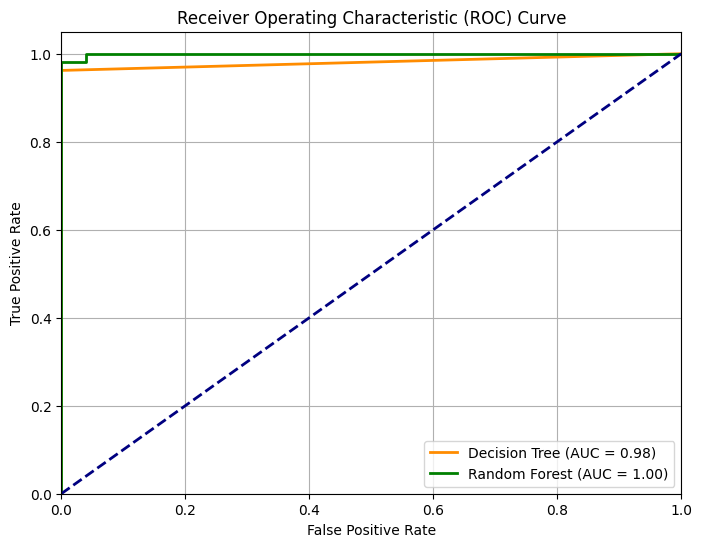

ROC Curve plot saved as 'roc_curve.png'


In [ ]:
# ROC Curve (Receiver Operating Characteristic) and AUC (Area Under the Curve)
from sklearn.metrics import roc_curve, auc

# Get probability predictions for the positive class (1 = Disease)
y_prob_dt = dt_classifier.predict_proba(X_test)[:, 1]
y_prob_rf = rf_classifier.predict_proba(X_test)[:, 1]

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label=f'Decision Tree (AUC = {roc_auc_dt:.2f})')
plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label=f'Random Forest (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.savefig('roc_curve.png')
plt.show()
print("ROC Curve plot saved as 'roc_curve.png'")

<Figure size 800x600 with 0 Axes>

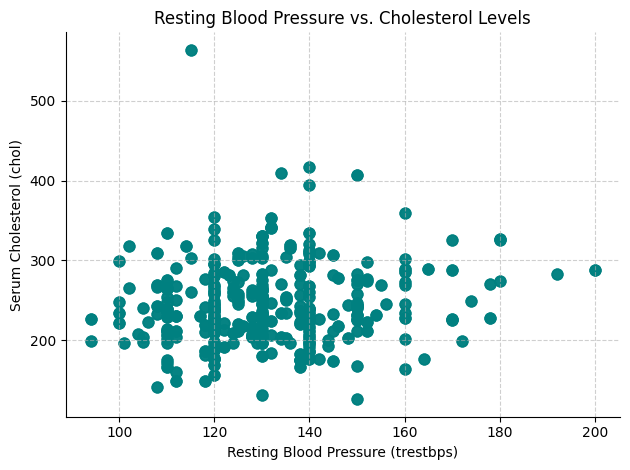

In [ ]:
from matplotlib import pyplot as plt

# --- Scatter Plot: trestbps vs. chol ---
plt.figure(figsize=(8, 6)) # Set a good figure size
df.plot(kind='scatter', x='trestbps', y='chol', s=60, alpha=0.7, color='teal') # Increased marker size, adjusted alpha, added color
plt.title('Resting Blood Pressure vs. Cholesterol Levels') # Clear title
plt.xlabel('Resting Blood Pressure (trestbps)') # Descriptive x-label
plt.ylabel('Serum Cholesterol (chol)') # Descriptive y-label
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.6) # Add a subtle grid
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.savefig('trestbps_chol_scatter.png') # Save the figure
plt.show() # Display the figure

<Figure size 800x600 with 0 Axes>

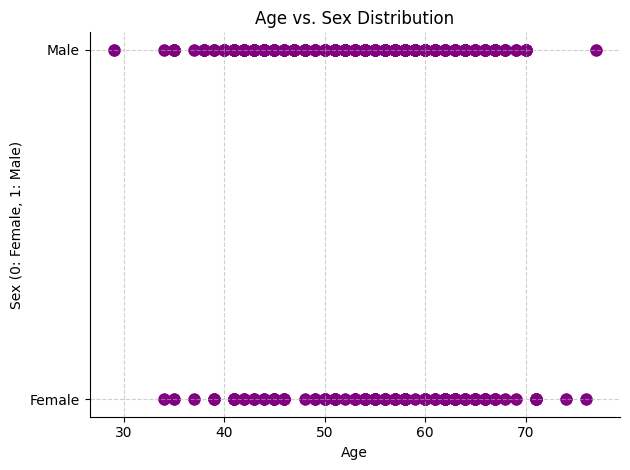

In [ ]:
# --- Scatter Plot: age vs. sex ---
# Note: 'sex' is categorical (0 and 1), so a scatter plot might not be the most informative
# but we can make it work. A categorical plot or grouped box plot might be better.
# For now, let's plot it as requested.
plt.figure(figsize=(8, 6))
df.plot(kind='scatter', x='age', y='sex', s=60, alpha=0.7, color='purple')
plt.title('Age vs. Sex Distribution')
plt.xlabel('Age')
plt.ylabel('Sex (0: Female, 1: Male)') # Clarify sex labels
plt.yticks([0, 1], ['Female', 'Male']) # Label the y-axis ticks clearly
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.savefig('age_sex_scatter.png')
plt.show()

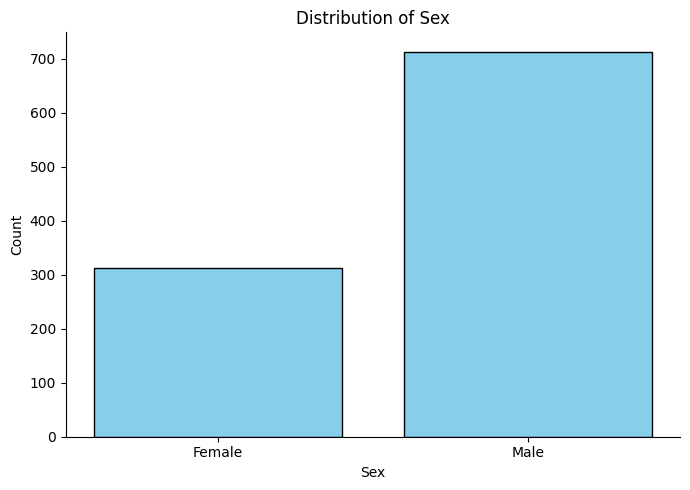

In [ ]:
# --- Histogram: sex distribution ---
plt.figure(figsize=(7, 5))
df['sex'].plot(kind='hist', bins=[-.5, .5, 1.5], rwidth=0.8, title='Distribution of Sex', color='skyblue', edgecolor='black') # Adjusted bins for binary, added rwidth for bar width
plt.xticks([0, 1], ['Female', 'Male']) # Label the x-axis ticks clearly
plt.xlabel('Sex')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.tight_layout()
plt.savefig('sex_histogram.png')
plt.show()

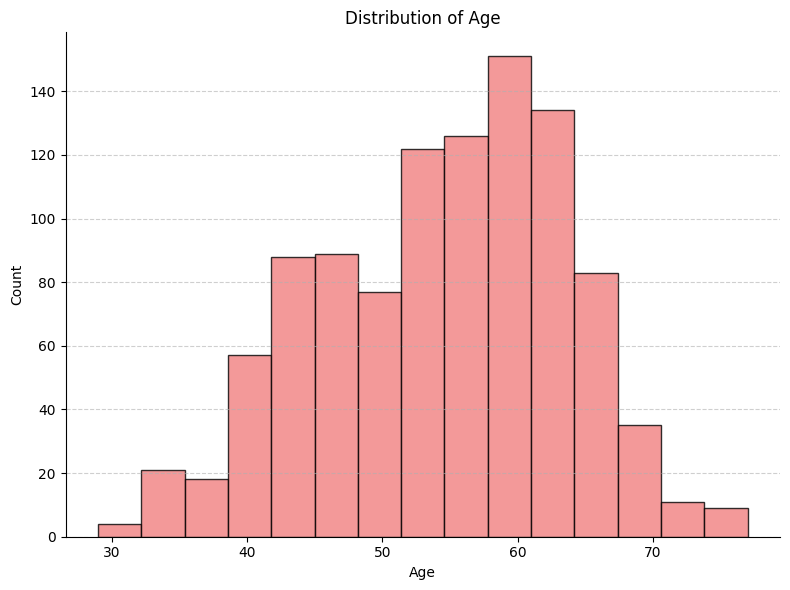

In [ ]:
# --- Histogram: age distribution ---
plt.figure(figsize=(8, 6))
df['age'].plot(kind='hist', bins=15, title='Distribution of Age', color='lightcoral', edgecolor='black', alpha=0.8) # Adjusted bins, added color and edge
plt.xlabel('Age')
plt.ylabel('Count')
plt.gca().spines[['top', 'right']].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.6) # Grid only on y-axis for clarity
plt.tight_layout()
plt.savefig('age_histogram.png')
plt.show()

In [ ]:
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
numerical_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Ensure 'target' is treated as categorical for some plots if needed
df['target'] = df['target'].astype('category')

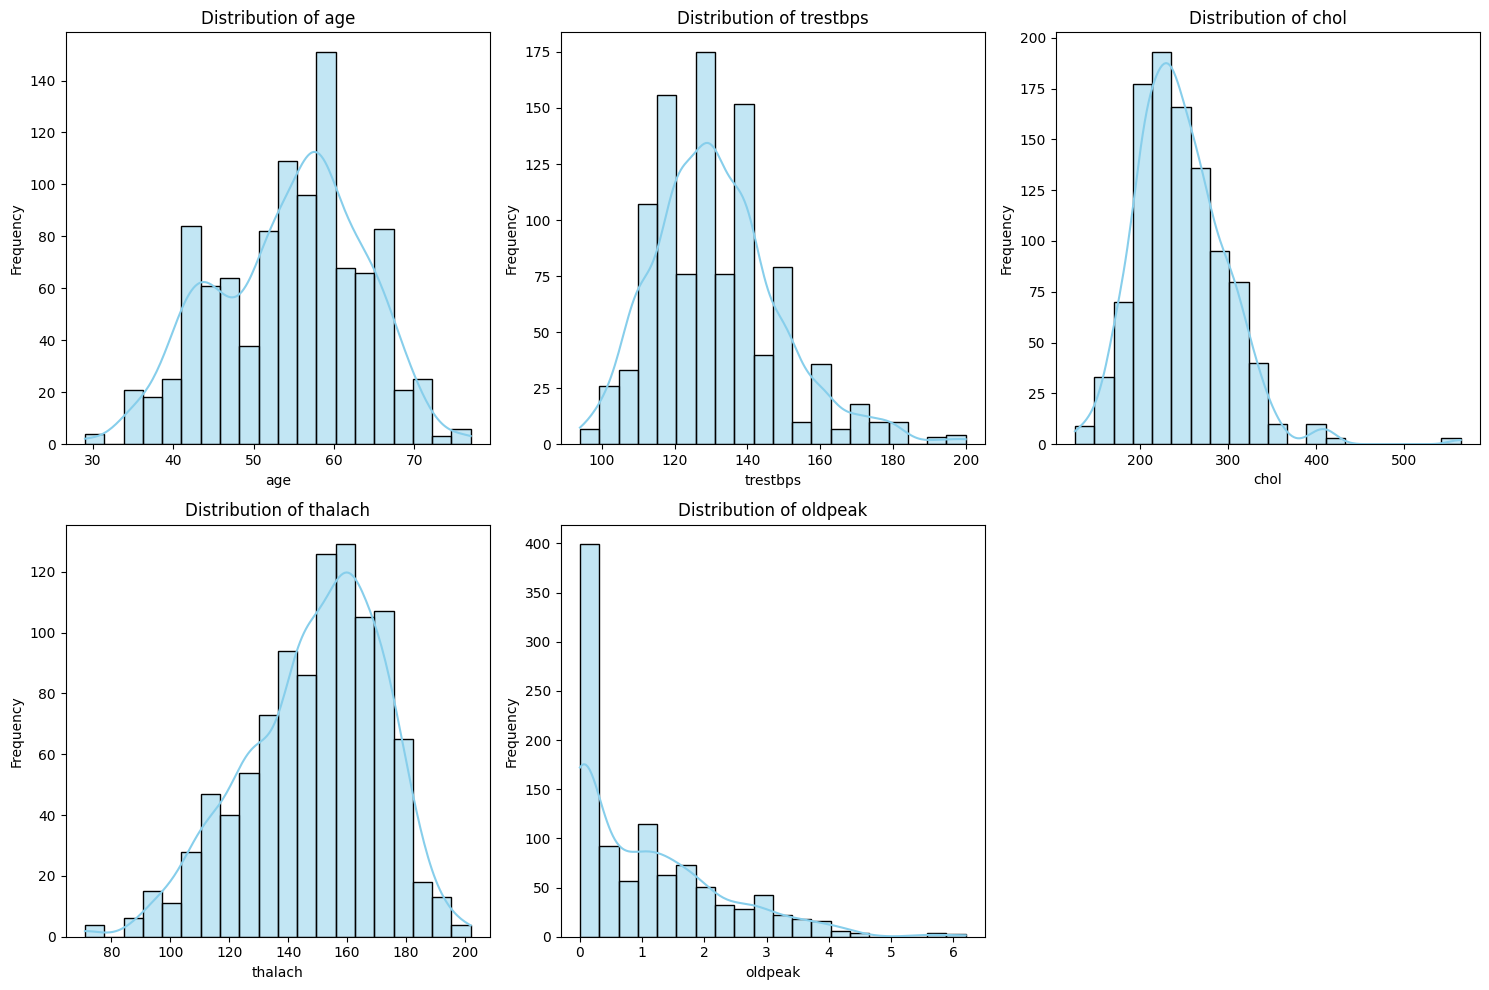

Numerical feature distributions saved as 'numerical_feature_distributions.png'


In [ ]:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of numerical features
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('numerical_feature_distributions.png')
plt.show()
print("Numerical feature distributions saved as 'numerical_feature_distributions.png'")

<ipython-input-49-7d719a42bd09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')
<ipython-input-49-7d719a42bd09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')
<ipython-input-49-7d719a42bd09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=df, palette='viridis')
<ipython-input-49-7d719a42bd09>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set 

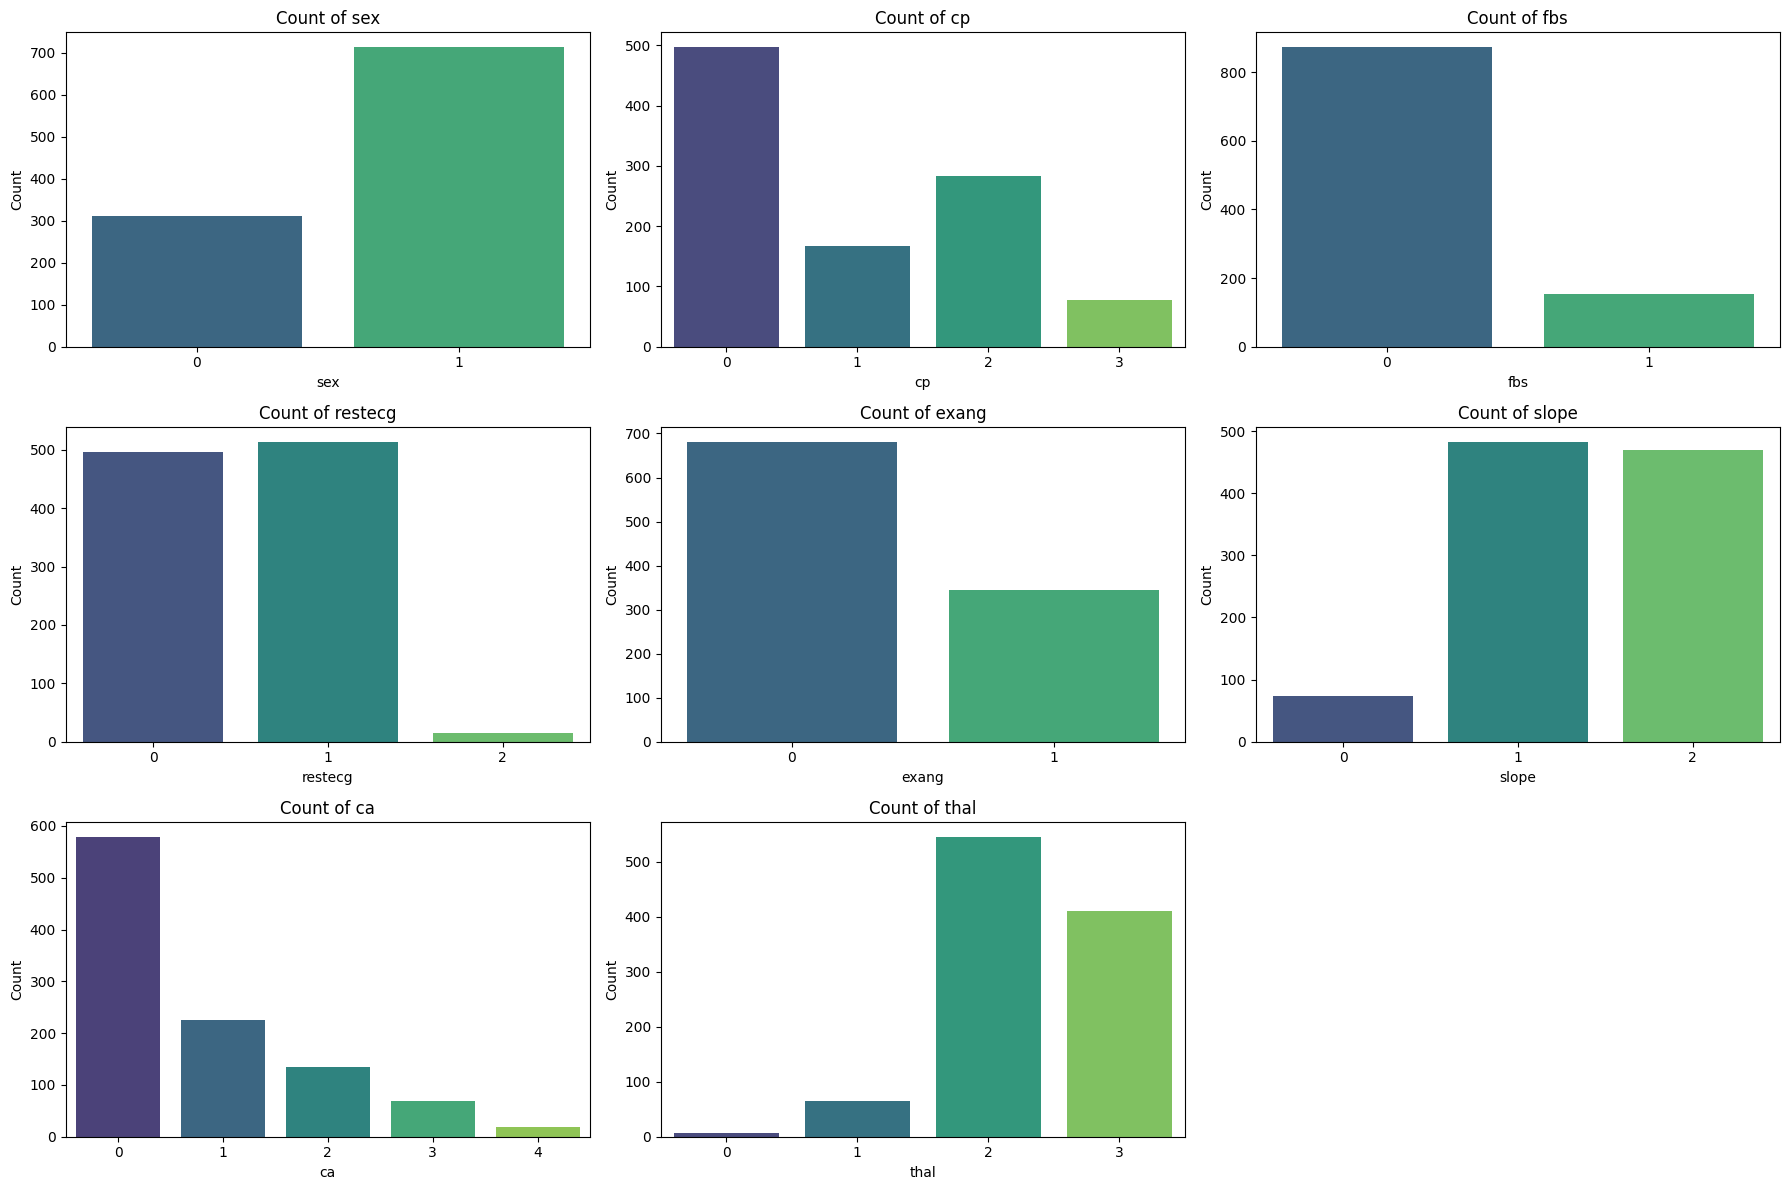

Categorical feature counts saved as 'categorical_feature_counts.png'


In [ ]:
plt.figure(figsize=(18, 12)) # Increased figure size
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1) # Adjust subplot grid as needed
    sns.countplot(x=feature, data=df, palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.savefig('categorical_feature_counts.png')
plt.show()
print("Categorical feature counts saved as 'categorical_feature_counts.png'")

<ipython-input-50-38273541ef75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
<ipython-input-50-38273541ef75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
<ipython-input-50-38273541ef75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='pastel')
<ipython-input-50-38273541ef75>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x`

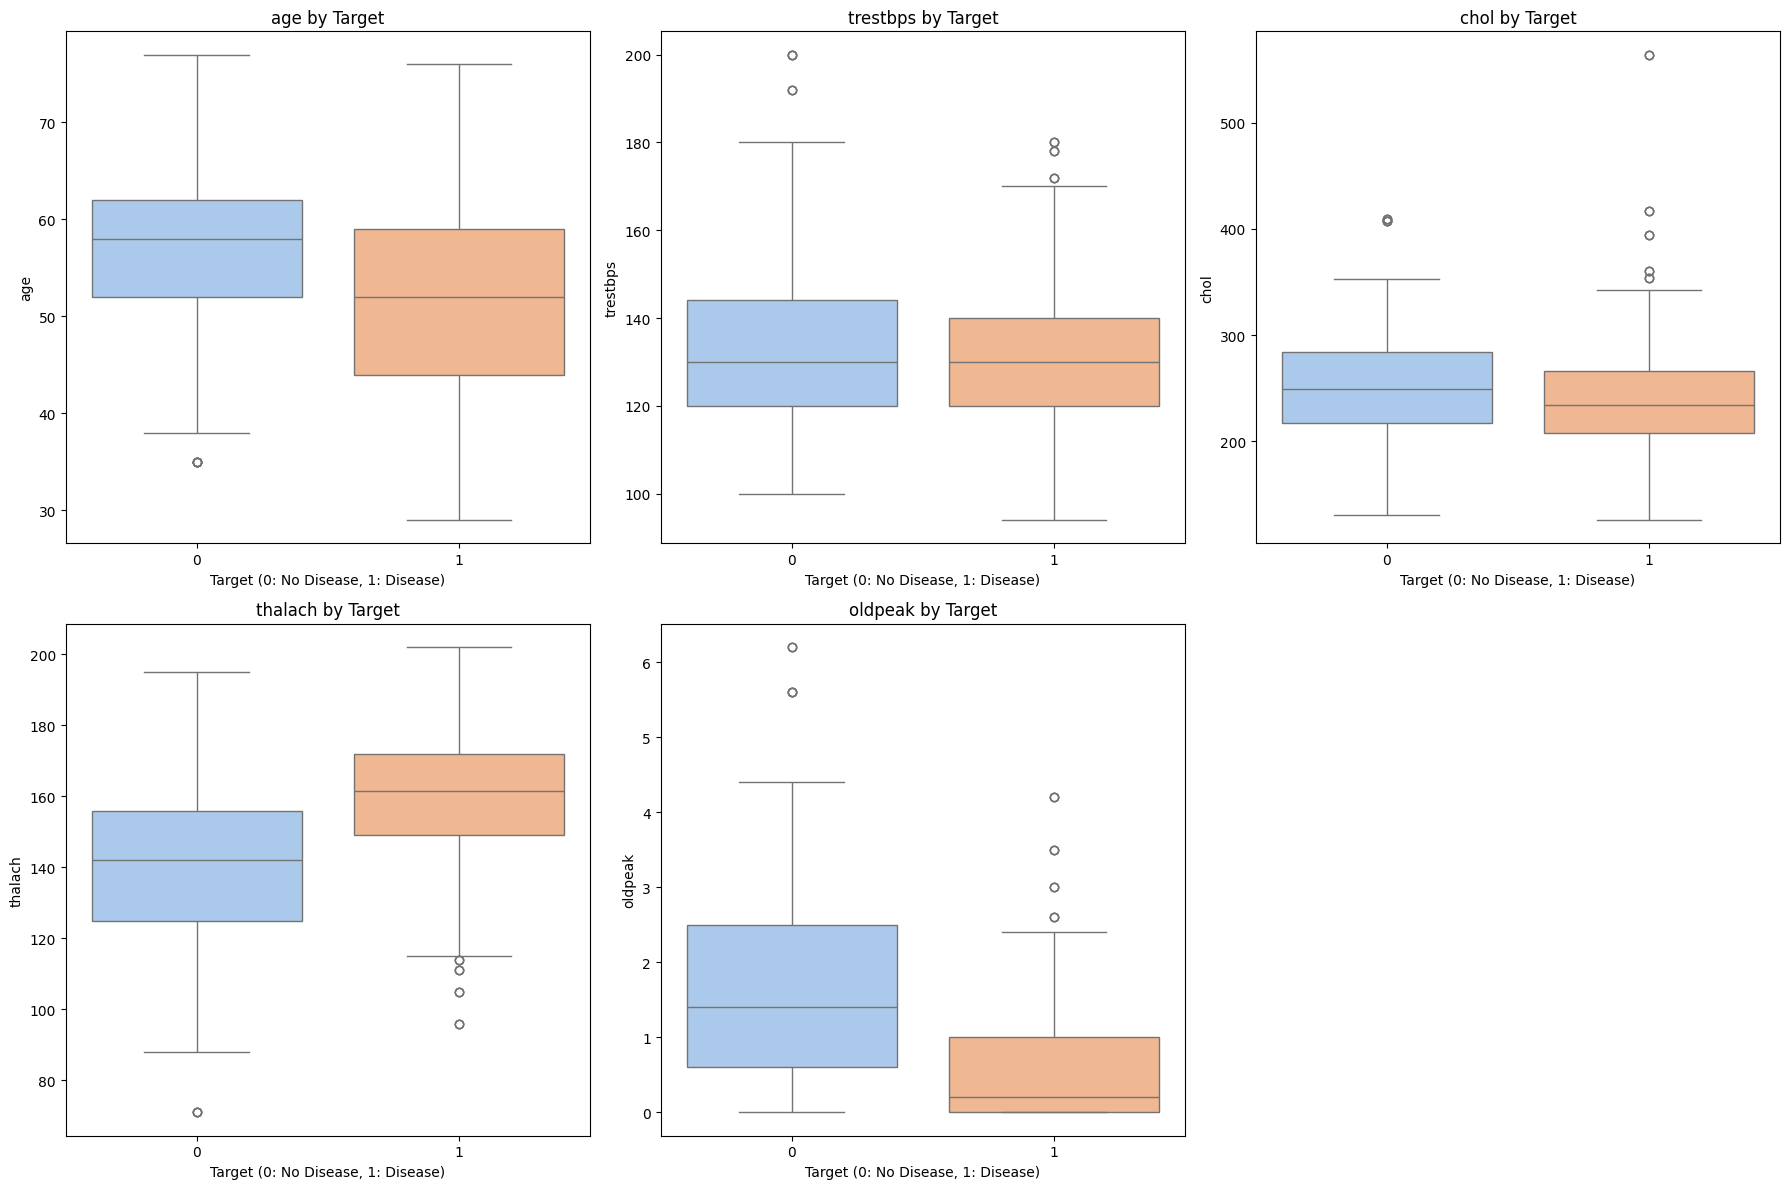

Box plots of numerical features by target saved as 'numerical_features_by_target_boxplot.png'


In [ ]:
plt.figure(figsize=(18, 12))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(x='target', y=feature, data=df, palette='pastel')
    plt.title(f'{feature} by Target')
    plt.xlabel('Target (0: No Disease, 1: Disease)')
    plt.ylabel(feature)
plt.tight_layout()
plt.savefig('numerical_features_by_target_boxplot.png')
plt.show()
print("Box plots of numerical features by target saved as 'numerical_features_by_target_boxplot.png'")

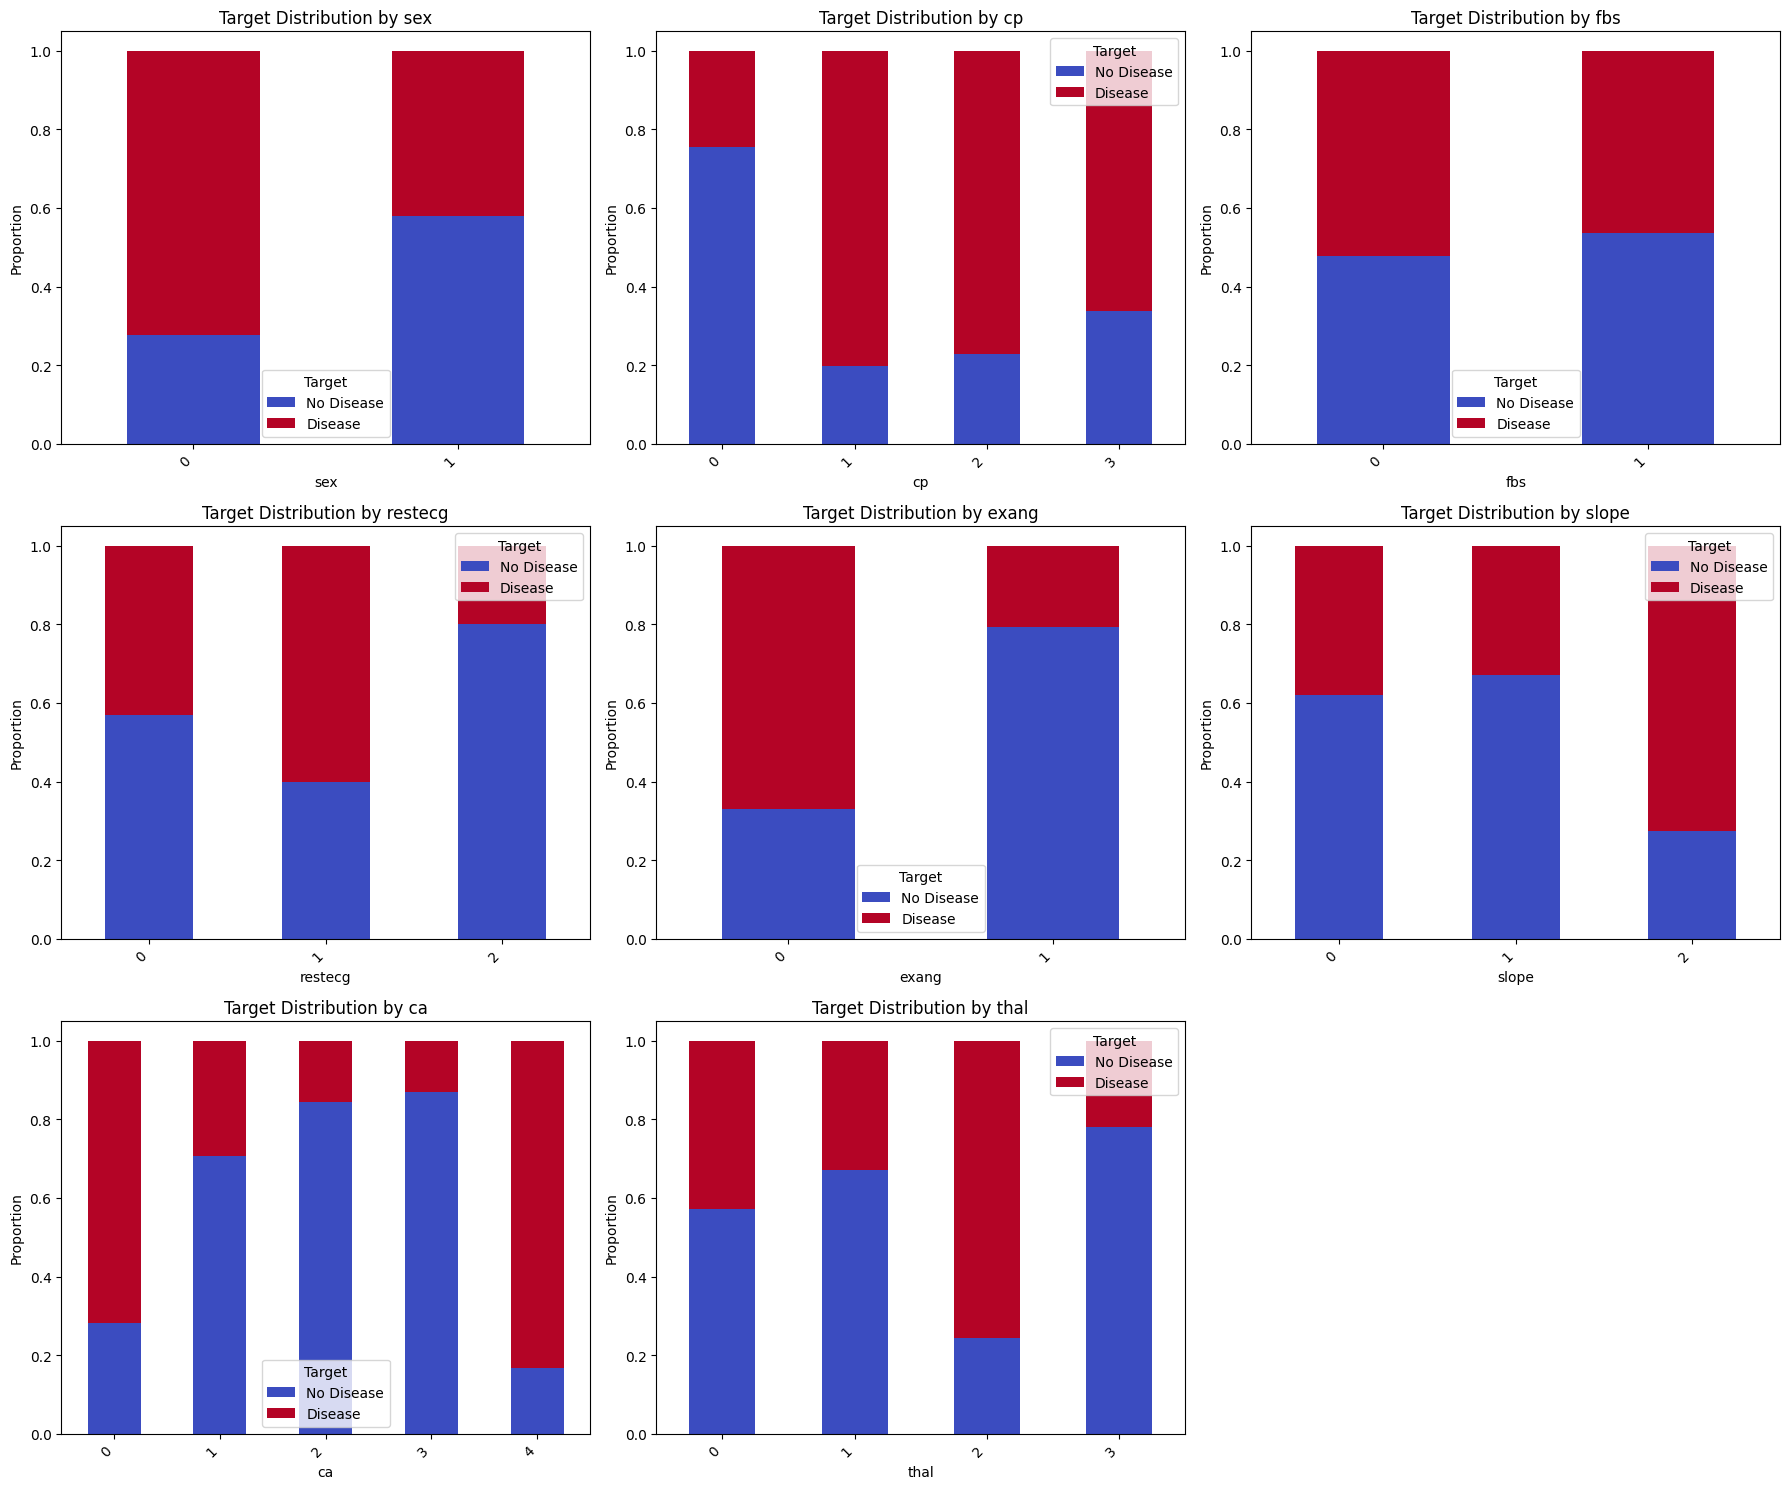

Stacked bar plots of categorical features by target saved as 'categorical_features_by_target_stackedbar.png'


In [ ]:
plt.figure(figsize=(18, 15))
for i, feature in enumerate(categorical_features):
    plt.subplot(3, 3, i + 1)
    # Create a cross-tabulation (contingency table)
    ct = pd.crosstab(df[feature], df['target'], normalize='index') # normalize='index' shows proportions per category
    ct.plot(kind='bar', stacked=True, colormap='coolwarm', ax=plt.gca())
    plt.title(f'Target Distribution by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Proportion')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Target', labels=['No Disease', 'Disease'])
plt.tight_layout()
plt.savefig('categorical_features_by_target_stackedbar.png')
plt.show()
print("Stacked bar plots of categorical features by target saved as 'categorical_features_by_target_stackedbar.png'")

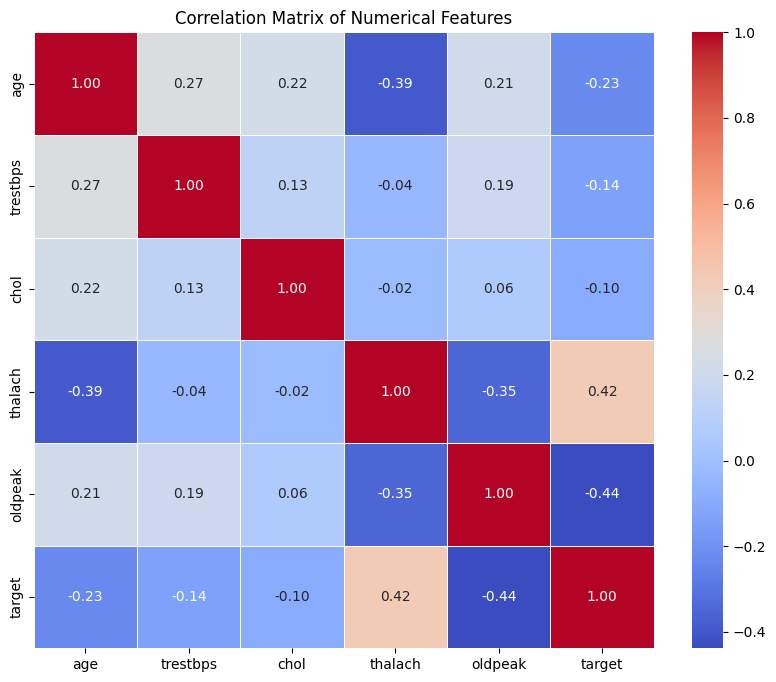

Correlation heatmap saved as 'correlation_heatmap.png'


In [ ]:
# Calculate the correlation matrix for numerical columns
correlation_matrix = df[numerical_features + ['target']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.savefig('correlation_heatmap.png')
plt.show()
print("Correlation heatmap saved as 'correlation_heatmap.png'")


Generating Pair Plot (might take a moment)...


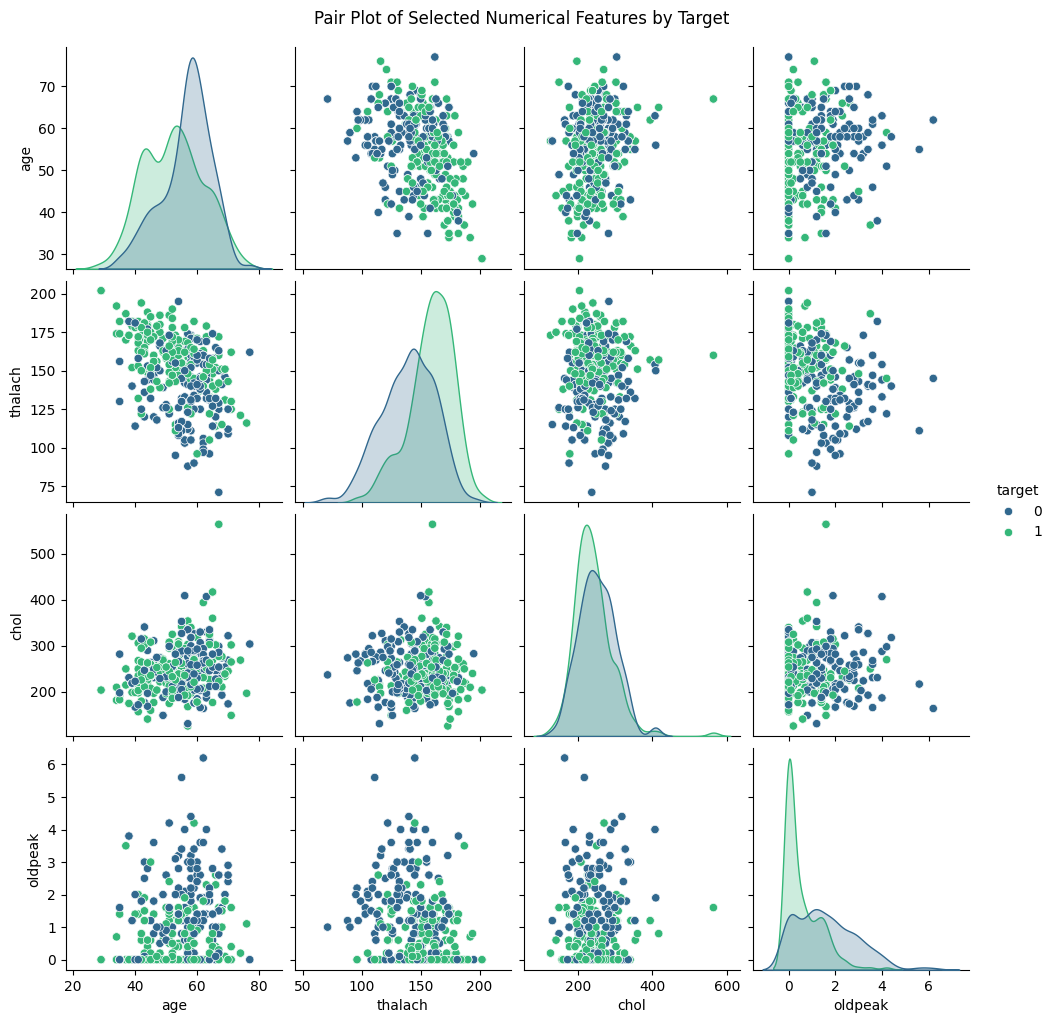

Pair plot of selected features saved as 'pair_plot_selected_features.png'


In [ ]:
# Selecting a subset of numerical features and the target for pair plot
selected_features_for_pairplot = ['age', 'thalach', 'chol', 'oldpeak', 'target']

print("\nGenerating Pair Plot (might take a moment)...")
sns.pairplot(df[selected_features_for_pairplot], hue='target', palette='viridis', diag_kind='kde')
plt.suptitle('Pair Plot of Selected Numerical Features by Target', y=1.02) # Adjust title position
plt.savefig('pair_plot_selected_features.png')
plt.show()
print("Pair plot of selected features saved as 'pair_plot_selected_features.png'")